Team Project: Group #10
Fraudulent transaction detection


# <div align="center"> Fraud Detection Amongst Credit Card Transactions </div>  
###### <div align="center"> Authors: Adeel Shah, Anasuya Ghosh, Daniel Henry, Qimei Huang, Viktoria Ganz </div>

## Introduction
With the continuous evolution of technology, worldwide commerce has adapted to leverage new methods as they became available. In 1950 after forgetting his wallet during a business dinner at a New York restaurant named "Cabin Grill", Frank McNamara came up with the idea to create the "Diners club card". This was essentially a charge card that worked on credit, users were able to make multiple purchases and pay off the total expense incurred at the end of each month. Fast forward to 2018 and there are now 41 billion general purpose credit cards in the hands of consumer in the United States accounting for $3.8 trillion USD of annual volume. This level of growth has presented card issuers with a unique issue they must face, picking the proverbial fraudulent needle out of the non-fraudulent haystack. How could credit card issuers identify and reject what is believed to be a fraudulent transaction when most transactions are not? This is the problem that will be explored within this notebook, we will be using and we will be applying common data science principals to develop an algorithm that can classify a transaction as fraudulent or not based on its attributes.



### About the data
The data set we are working with was sourced from <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Kaggle</a> and is a collection of transactions made in 2013 by European cardholders. These transactions took place over the course of 2 for a total of 284,807 trades, 492 of which are fraudulent. The data contains time, amount and classification of each transaction as well as 28 variables that have already undergone a PCA transformation, a description of these variables could not be shared to protect the confidentiality of the transactions.


### Goals
- Collect the and clean (if required) the data
- Perform primilinary inspection of the data
- Determine charatarists of each classfication
- Prepare data for classification
- Predict classification based on transaction data

### References: 
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- https://www.creditcards.com/credit-card-news/market-share-statistics.php
- https://www.creditcards.com/credit-card-news/history-of-credit-cards.php
- https://www.kaggle.com/mlg-ulb/creditcardfraud

### Preparing the notebook

In this notebook we use various standard Python libraries in order to inspect, analyize and classify the data. All of the required libraries are loaded here

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Gathering the Data

Github restricts file sizes to 100MB and the dataset we're working with is just under 1GB, for this reason within our reposity the data has been split into 7 seperate CSVs (around 20MB each). The expectation is that the user of this notebook has cloned the entire reposity and so the CSVs can be loaded with a simple "read_csv" command. Once loaded the CSVs are appended into a single dataframe "df"

In [2]:
df1 = pd.read_csv("cc01.csv")
df2 = pd.read_csv("cc02.csv")
df3 = pd.read_csv("cc03.csv")
df4 = pd.read_csv("cc04.csv")
df5 = pd.read_csv("cc05.csv")
df6 = pd.read_csv("cc06.csv")
df7 = pd.read_csv("cc07.csv")

df= df1.append(df2).append(df3).append(df4).append(df5).append(df6).append(df7)


### Initial inspection

In [3]:
#df.info()
#print(df)
d=df[['Time','Amount','Class']]

fraud = d['Class']>0
zero_transactions = d['Amount']<0.01
#print(fraud.info())
print(d[fraud].describe())
print(d[zero_transactions].describe())
#print(d[fraud & zero_transactions].info()

fraud_mean=d[fraud].mean()
fraud_stdev=d[fraud].std()
print(fraud_mean)
print (df.head())
#fraud_amount = fraud['Amount']
#np=fraud['Amount'].to_numpy()
#=np.array(fraud['Amount'])


                Time       Amount  Class
count     492.000000   492.000000  492.0
mean    80746.806911   122.211321    1.0
std     47835.365138   256.683288    0.0
min       406.000000     0.000000    1.0
25%     41241.500000     1.000000    1.0
50%     75568.500000     9.250000    1.0
75%    128483.000000   105.890000    1.0
max    170348.000000  2125.870000    1.0
                Time  Amount        Class
count    1825.000000  1825.0  1825.000000
mean    89370.688767     0.0     0.014795
std     48065.662780     0.0     0.120763
min       282.000000     0.0     0.000000
25%     47284.000000     0.0     0.000000
50%     83419.000000     0.0     0.000000
75%    131288.000000     0.0     0.000000
max    172759.000000     0.0     1.000000
Time      80746.806911
Amount      122.211321
Class         1.000000
dtype: float64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0

In [4]:
allfraud = df[df.Class == 1]
allnonfraud = df[df.Class == 0]
z = np.abs(stats.zscore(allnonfraud.V1))
count = 0
for idx, score in enumerate(z):
    if score > 3:
        count += 1
        print (idx, score)
#print(count)

164 3.16171201442705
290 3.0369418997938795
1156 3.2013100333773745
1630 5.777232109351172
2176 3.035263256354521
2462 6.309660514086911
2680 3.914639679683264
2790 5.590611987560768
2955 3.086696216161411
2961 3.217088351771551
3507 3.0667701535481586
3552 3.491936501688752
4233 4.126951926656193
4606 4.096148628540775
4774 3.013415364786227
4808 3.0345219012406495
5293 3.3233753893966496
5368 4.223676633425176
5422 4.529815796662481
5523 3.0300010390697834
5531 4.177304439533473
5532 4.469944215204409
5712 3.6122298766143937
5794 4.347851916127383
5885 4.715967689615862
6219 3.901085260293141
6456 3.0905844411380357
6489 3.0527747862357413
6610 4.758862852238869
6710 3.1999041876852243
6764 3.4094504394667116
6793 11.957183106875299
6881 3.946271251802403
6934 3.030282794172434
6945 3.3100735471171454
7055 3.822247714038907
7056 4.1033228494643135
7065 4.389875523298481
7079 4.676531296884531
7119 4.96328133360425
7153 3.134278802891656
7221 3.5927242987760075
7230 3.147857188363535


55156 6.204444207412332
55166 3.1813288492942684
55199 3.5586415297061396
55305 3.3688975688098193
55582 5.0631426651894476
55673 3.331065586328482
55839 3.2615139811209124
55907 3.6000476566103763
55914 3.2537025080426103
55988 5.671533760567323
56030 3.5023088182259206
56162 3.7224857212148574
56179 8.918802410740676
56192 3.646269138825358
56399 3.1925897566333505
56864 3.193601931061996
56937 3.674665331362252
56945 3.6390114620460112
57011 3.040830860593987
57052 7.019195620254772
57150 8.99801996992365
57418 3.1782764550212623
57622 3.0258040558232335
57659 3.1537744455584633
57711 3.3175874666517022
57853 3.8148160725244007
57938 3.7993859800026777
57989 4.978376068355319
58010 3.302863108132671
58046 3.4294303482951762
58056 3.0049056879776677
58087 5.10567340138692
58284 3.1379896669450167
58304 19.07470947877202
58340 5.406545328712421
58379 3.0733427335825882
58636 4.303951442443362
58649 5.7732240270201185
58687 9.688514057818258
58935 6.149750903916067
59057 3.045439224095

105562 3.1609533783432218
105609 4.709336542695848
105635 3.2107676192424837
105778 12.510599280455244
105784 4.749164576957877
105834 4.260655522369432
105849 8.003484701815893
105913 5.742442255887066
105948 4.3146339971883885
106035 6.564795756499278
106036 4.555339195965773
106042 4.611794467138074
106143 6.951709398500128
106165 4.480747581801653
106189 8.718806002579887
106290 7.067777899360098
106386 3.348254962843271
106423 9.132692694909958
106433 8.726397047815556
106696 3.1676529433743412
106748 9.546948931266073
106892 5.06782765071548
106899 5.257760752965392
106930 3.2255581780384595
106981 3.0415486424107505
106992 3.189862076081586
107087 3.6786601730160946
107355 4.665112439852942
107380 4.774436216847351
107415 3.897816292441634
107437 3.641661289364149
107507 3.1737875788899323
107509 3.5659061050897343
107569 6.2341450745761176
107667 4.84963357333922
107989 4.035218606457093
108039 6.480829591559189
108149 3.125984537889591
108186 17.313791491206537
108247 6.313133

173932 12.316908869180992
174090 3.0279460918738637
174260 3.372045665735958
174399 3.266745084990583
174564 4.686950955371868
174589 3.465120689583273
174704 3.530482820052935
174847 3.452001241363294
174954 3.292432853268991
175212 4.095978503560553
175349 6.515264420556406
175431 3.781234280063854
175555 3.0324293716012374
175712 3.5556142321957633
175717 3.00324799892564
175725 4.288436644202278
175749 3.4776889288047563
175762 3.248828038642338
175803 3.674348090913035
175867 3.3058112398454194
175969 4.335421154641823
175973 18.28276148440022
175996 3.2079902783783925
176017 3.489904672304841
176053 8.507038605432367
176103 3.7736560676933673
176324 3.1774153736539055
176347 3.1496456182211303
176410 3.265046741691114
176421 3.926496661562262
176440 4.609498150148643
176477 4.814619702561166
176565 3.529826991982522
176715 3.385959087703449
176769 7.6340087809008645
176806 8.857756302657009
176823 3.8020263214161103
176826 3.9105438804566113
176837 4.084083825755426
176841 4.5662

224446 3.73290946196797
224494 3.97723193530626
224496 4.263033583647795
224497 4.008047171898599
224666 9.637301111305561
224735 4.314596405417556
224753 3.8809475940190117
224875 4.007436603190623
224952 5.208229334112831
224958 4.502337901986984
225064 4.140925657130908
225108 5.408336038068256
225153 4.794419916721311
225250 3.7030911231760326
225254 5.052489236617897
225282 6.695998524486038
225359 5.839803600242749
225394 4.787172816109068
225407 4.514761337883402
225412 3.307202247812487
225432 7.980887319102383
225466 3.05245191414595
225536 3.595948660178871
225646 5.0895939627778475
225693 3.8847174296608737
225742 4.033138815373093
225817 4.173547325865085
225873 4.9598491502586635
225904 4.462849097896232
225939 4.2613163514486025
225986 3.4922612739649597
226083 3.7810915095807083
226184 4.092583273063014
226195 3.587018338994295
226196 3.587018338994295
226226 4.206743214145359
226237 5.376594198654689
226268 12.43062284889583
226275 5.73853419373116
226303 5.072687515055

266483 3.2943188890752495
266502 3.710540923985006
266518 4.472675995122072
266544 4.099660876735921
266562 5.522580587969262
266671 3.4931485345845634
266782 3.583839418318812
266857 3.872512773777034
267013 3.2196599159712913
267586 3.2448619495501907
267701 3.652647076448382
267741 3.205199215442712
267791 4.7671664699719525
267884 5.91473113751796
267909 4.367760559933323
268075 3.0629856651734575
268215 3.981439429428536
268216 3.981439429428536
268217 3.981439429428536
268218 3.981439429428536
268379 3.068646650594785
268399 3.279379059158386
268742 3.082214212206865
269051 3.644532791279358
269159 3.7952646036553888
269237 3.960137207973378
269425 3.1084768161539897
269446 3.9455869266357713
269491 4.239919383392656
269516 3.0765530599297897
269620 3.2891071679361326
269714 4.421766413604078
269723 4.660722660490108
269784 3.01413968506828
269804 3.6498962096841154
269832 3.395332769482247
269887 3.3022247242606633
269915 3.559215474095707
270066 3.2890713468053296
270121 3.4622

In [5]:
allfraud.shape

(492, 31)

In [6]:
allnonfraud.shape

(284315, 31)

### Data Analysis

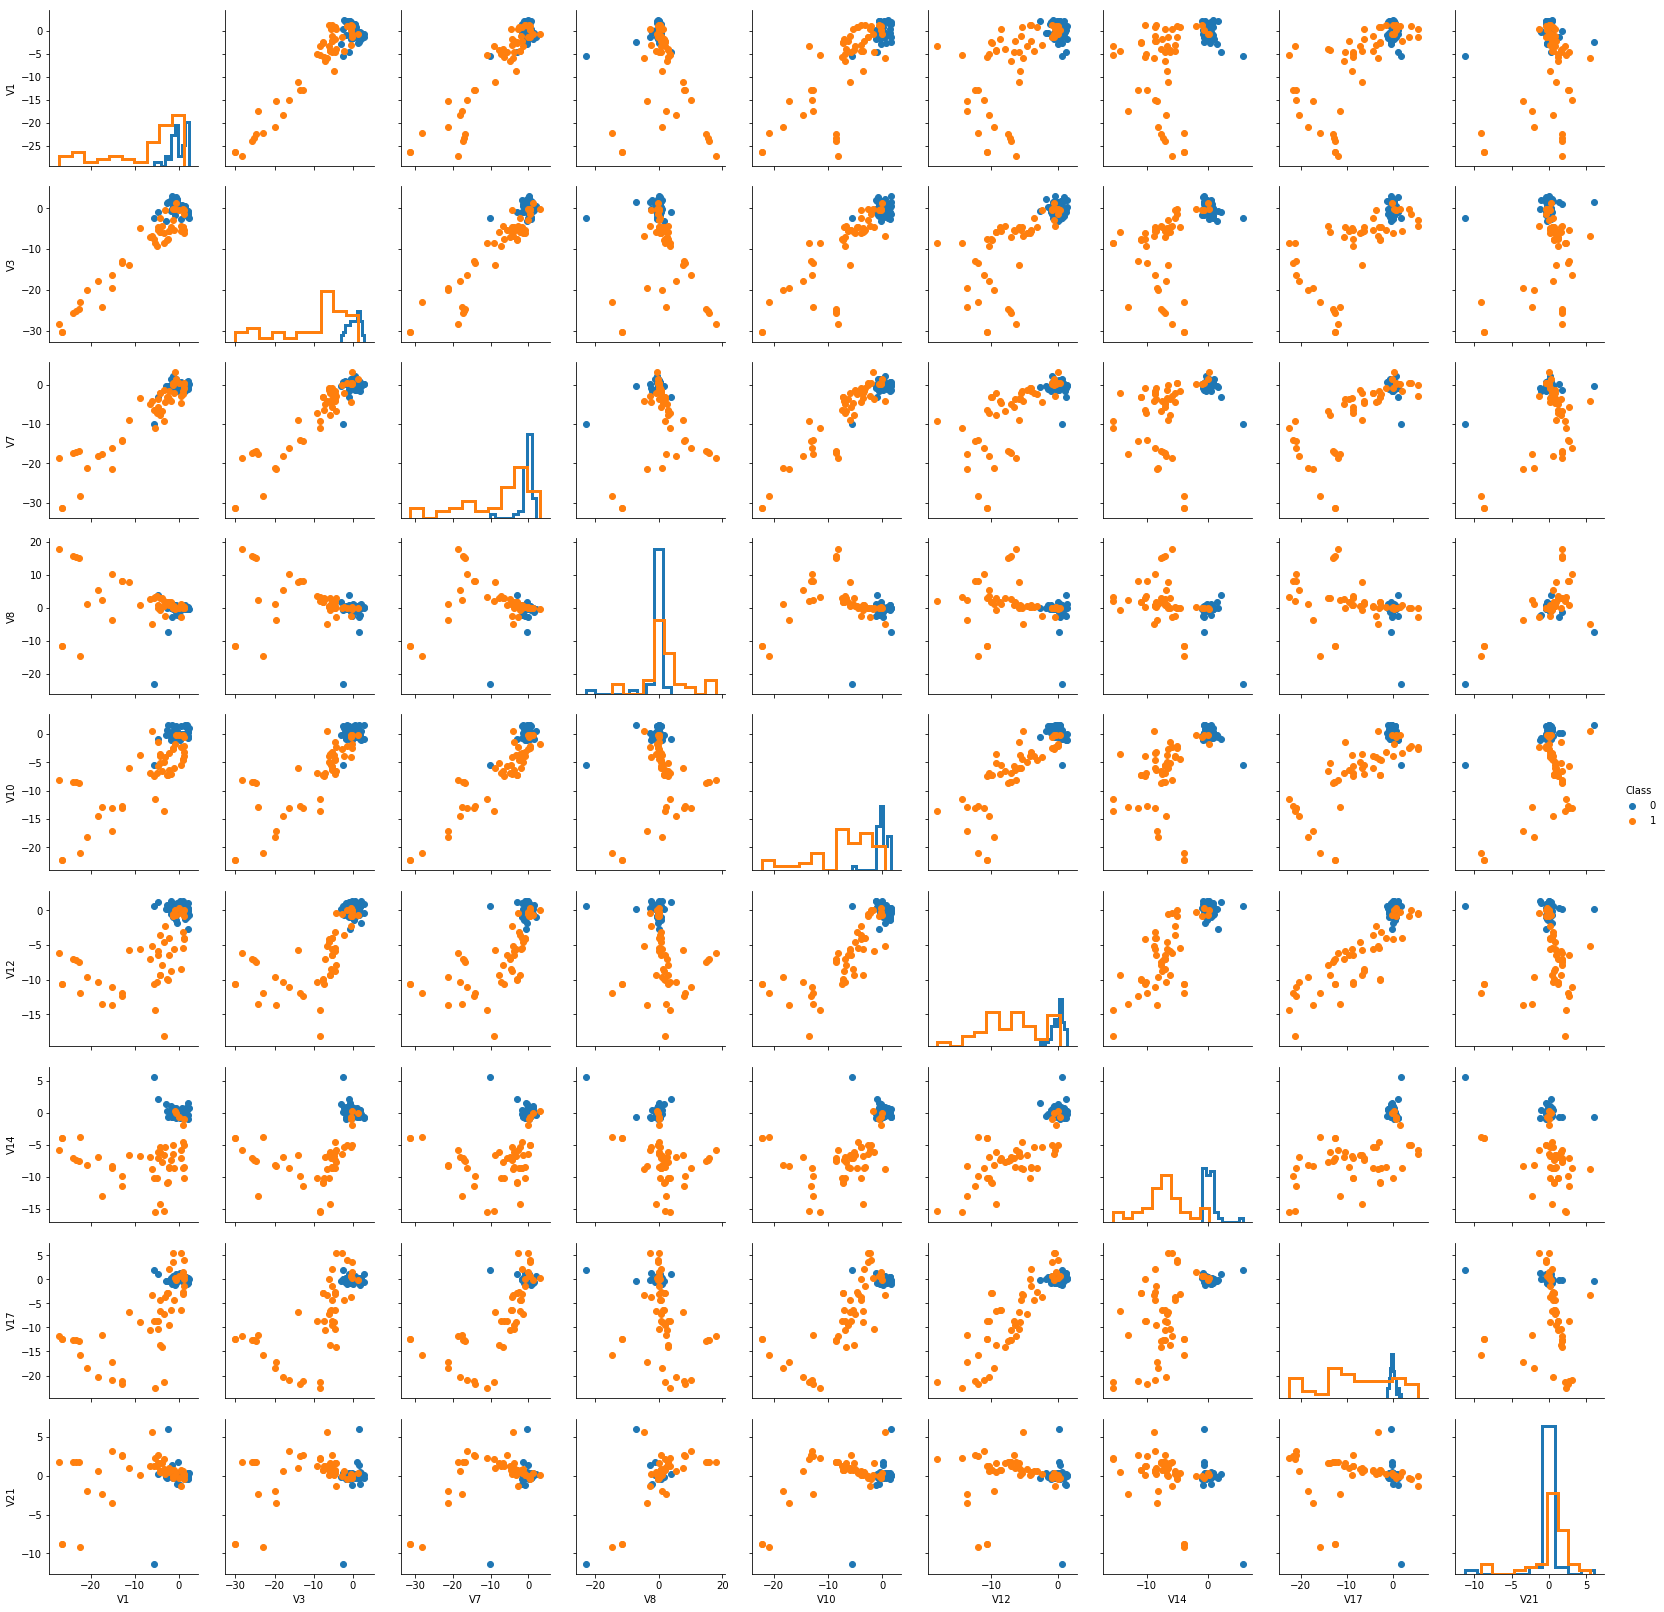

In [7]:
balancedset = pd.concat([allfraud.sample(n=50), allnonfraud.sample(n=50)])
grid = sns.PairGrid(balancedset, hue="Class", vars=["V1", "V3", "V7", "V8", "V10", "V12", "V14", "V17", "V21"])
grid.map_offdiag(plt.scatter)
grid.map_diag(plt.hist, histtype="step", linewidth=3)
grid.add_legend();

In [14]:
balancedset.shape

(984, 31)

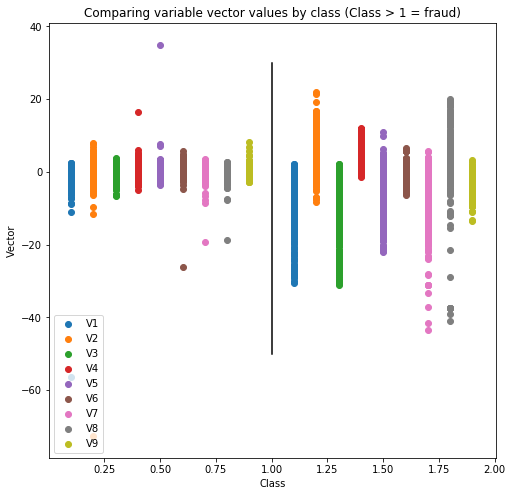

In [8]:
balancedset = pd.concat([allfraud, allnonfraud.sample(n=492)])
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 1:10]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

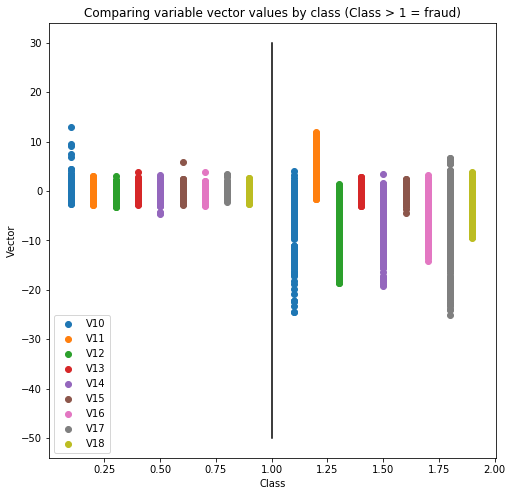

In [9]:
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 10:19]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

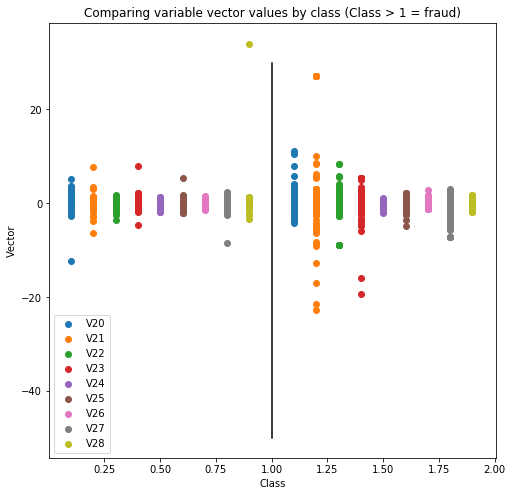

In [10]:
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 20:29]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

C:\Users\qmhua\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


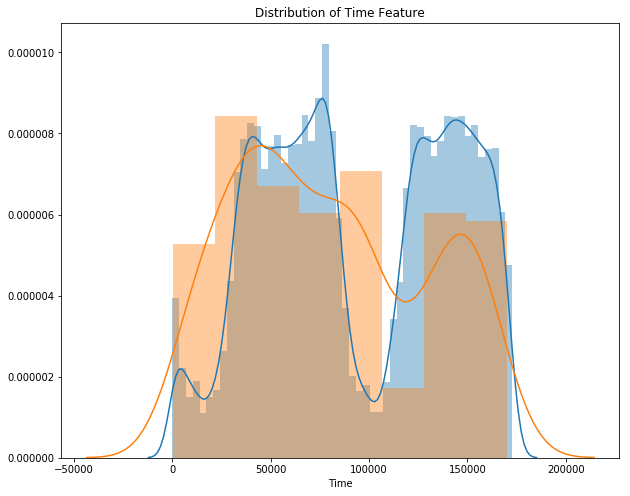

In [11]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(d.Time)
sns.distplot(d[fraud].Time)

In [12]:
print(len(df))

mask = np.random.rand(len(df))< 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

284807
Train Shape: (256310, 31)
Test Shape: (28497, 31)
There are 445 fraudulent transactions in the train data.


In [13]:
mask

array([ True,  True,  True, ...,  True, False,  True])

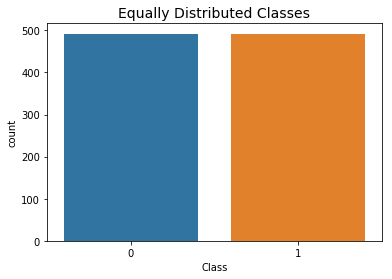

In [20]:
sns.countplot('Class', data=balancedset)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

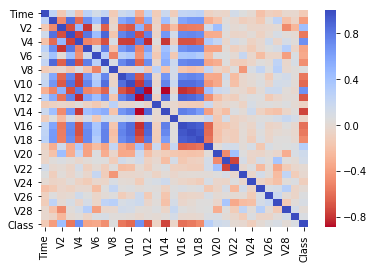

In [21]:
#use subsample to plot correlation
sub_sample_corr = balancedset.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

### Machine Learning: 1.logistic regression

In [15]:
balancedset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [16]:
#Undersampling before cross validating (prone to overfit)
X = balancedset.drop('Class', axis=1)
y = balancedset['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
clf

C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#apply cross validation
from sklearn.model_selection import cross_val_score
training_score = cross_val_score(clf, X_train, y_train, cv=10)
training_score

C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.925     , 0.925     , 0.9625    , 0.93670886, 0.96153846,
       0.96153846, 0.97435897, 0.91025641, 0.96153846, 0.91025641])

In [19]:
training_score.mean()

0.9428696040246674